# Investment Strategy

Date: Jan 25, 2022
Authors: af, jk, jv, gl

## 1. Processing Data from Kenneth R French Data Library
The following codes are processing the " 25 Portfolios Formed on Size and Operating Profitability (5 x 5) " data. Our initial analysis where we processed the "Portfolios Formed on Operating Profitability" used the same structure of codes.

We have processed the raw data before loading it.

In [ ]:
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
from tqdm import tqdm
import os
path_data = 'data/'

In [2]:
portfolios = pd.read_csv('op_data2.csv',index_col=0, delimiter=',')
portfolios

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,SMALL HiOP,ME2 OP1,ME2 OP2,ME2 OP3,ME2 OP4,ME2 OP5,...,ME4 OP3,ME4 OP4,ME4 OP5,BIG LoOP,ME5 OP2,ME5 OP3,ME5 OP4,BIG HiOP,year,month
date,,,,,,,,,,,,,,,,,,,,,
196307,-0.5880,1.3361,2.5678,-0.8866,-0.9773,-1.1724,-1.9800,-0.9323,0.8199,0.4124,...,-2.0771,-1.2839,0.0144,0.2983,1.5917,0.0529,-0.9568,0.6882,1963,7
196308,2.3656,4.0255,2.4627,2.6665,4.1942,6.5111,5.8692,3.8409,4.8916,3.7759,...,6.4204,4.4289,6.5983,4.8572,4.2866,5.3068,5.6946,5.9835,1963,8
196309,-1.3983,-0.8718,-1.9406,4.2566,-1.3751,-1.8380,-1.7595,0.0814,-2.1056,-4.0012,...,-2.2074,-2.6623,-2.3075,-2.4348,-2.2749,0.8966,-1.8203,-1.2376,1963,9
196310,0.2669,-0.9385,1.3085,3.1559,0.3955,3.6192,3.1351,1.2895,-1.2666,4.7457,...,1.7736,-0.6654,3.0401,-0.0258,0.1551,2.4051,3.1520,7.7794,1963,10
196311,-2.1755,-1.4130,-3.3743,-2.3083,-3.1325,-1.3337,-0.1868,-0.0751,-1.1251,-2.1496,...,-0.0628,-0.4844,0.6525,-0.9922,-1.1321,1.2581,0.7443,-2.7711,1963,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202309,-9.1038,-4.5235,-4.7383,-4.6602,-1.6621,-9.0893,-6.7445,-5.8435,-4.2226,0.3833,...,-5.2760,-5.8619,-3.0683,-3.8952,-4.0285,-5.0979,-3.4216,-5.4310,2023,9
202310,-11.2584,-5.2852,-4.1779,-4.7986,-6.4517,-10.0365,-6.8011,-4.2202,-5.4703,-5.1131,...,-6.0338,-5.6697,-4.5924,-3.3972,-1.9035,-1.2196,-4.0129,-0.2297,2023,10
202311,9.4524,7.1962,6.7548,6.2998,9.2918,12.8955,9.3328,8.2220,6.6199,6.6410,...,9.4487,9.7650,8.1519,14.6994,10.8387,9.5259,7.4883,9.3197,2023,11


In [3]:
ff = pd.read_excel('F-F_Research_Data_Factors_2024.xlsx')
ff

,DATE,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31
...,...,...,...,...,...
1166,202309,-5.24,-2.51,1.52,0.43
1167,202310,-3.19,-3.87,0.19,0.47
1168,202311,8.84,-0.02,1.64,0.44
1169,202312,4.85,6.34,4.93,0.43


In [4]:

# rename columns
ff.rename({'Mkt-RF':'ExMkt',
           'DATE':'date'},axis=1,inplace=True)
# date variables
ff['year'] = ff['date'] // 100
ff['month'] = ff['date'] % 100
ff.set_index('date',inplace=True)


### formatting ###
# FF data is in percent. Convert to simple returns
ff[['ExMkt', 'SMB', 'HML', 'RF']] /= 100
ff



,ExMkt,SMB,HML,RF,year,month
date,,,,,,
192607,0.0296,-0.0256,-0.0243,0.0022,1926,7
192608,0.0264,-0.0117,0.0382,0.0025,1926,8
192609,0.0036,-0.0140,0.0013,0.0023,1926,9
192610,-0.0324,-0.0009,0.0070,0.0032,1926,10
192611,0.0253,-0.0010,-0.0051,0.0031,1926,11
...,...,...,...,...,...,...
202309,-0.0524,-0.0251,0.0152,0.0043,2023,9
202310,-0.0319,-0.0387,0.0019,0.0047,2023,10
202311,0.0884,-0.0002,0.0164,0.0044,2023,11


In [5]:

### merge portfolio returns with Fama French data ###
# date variables
# only after 1999
portfolios_ff = portfolios[portfolios.index >= 199907].copy()
#first 10 column divided by 100
portfolios_ff.iloc[:,:25] /= 100

# merge
portfolios_ff = pd.merge(portfolios_ff, ff, on=['year', 'month'])


In [6]:
#longshort
portfolios_ff['L-S1'] = portfolios_ff["SMALL HiOP"] - portfolios_ff["SMALL LoOP"]  
portfolios_ff['L-S2'] = portfolios_ff["ME2 OP5"] - portfolios_ff["ME2 OP1"]
portfolios_ff['L-S3'] = portfolios_ff["ME3 OP5"] - portfolios_ff["ME3 OP1"]
portfolios_ff['L-S4'] = portfolios_ff["ME4 OP5"] - portfolios_ff["ME4 OP1"]
portfolios_ff['L-S5'] = portfolios_ff["BIG HiOP"] - portfolios_ff["BIG LoOP"]

In [7]:
# Calculate the excess returns
ranklist = portfolios.columns[:25]
for p in ranklist:
    portfolios_ff['ExRet_'+p] = portfolios_ff[p]-portfolios_ff['RF']


In [28]:
import scipy.stats as stats

# calculate average returns
average_returns = portfolios_ff.mean()

# calculate t-statistics and p-values
t_stats = average_returns / (portfolios_ff.std() / np.sqrt(len(portfolios_ff)))
p_values = [stats.t.sf(np.abs(t), len(portfolios_ff)-1)*2 for t in t_stats]

# calculate standard deviations
standard_deviations = portfolios_ff.std()

# calculate skewness
skewness = portfolios_ff.skew()

# calculate kurtosis
kurtosis = portfolios_ff.kurt()

# create results data frame
results_df = pd.DataFrame({
    'Mean': average_returns,
    't-stat': t_stats,
    'p-value': p_values,
    'SD': standard_deviations,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

results_df


,Mean,t-stat,p-value,SD,Skewness,Kurtosis
SMALL LoOP,0.008010,1.688788,0.092320,0.081461,0.477943,2.456162
ME1 OP2,0.011360,3.361278,0.000878,0.058049,-0.233649,1.575462
ME1 OP3,0.010973,3.405405,0.000753,0.055342,-0.350621,1.644418
ME1 OP4,0.012865,2.678444,0.007813,0.082495,4.428446,52.783313
SMALL HiOP,0.009875,2.416074,0.016298,0.070197,-0.244599,2.048208
...,...,...,...,...,...,...
ExRet_BIG LoOP,0.000662,0.178883,0.858153,0.063563,-0.579432,1.763720
ExRet_ME5 OP2,0.004541,1.519513,0.129708,0.051334,-0.336524,0.876785
ExRet_ME5 OP3,0.005322,1.838146,0.067050,0.049733,-0.422455,0.867142
ExRet_ME5 OP4,0.006179,2.408333,0.016641,0.044069,-0.349341,0.465657


### The following cell only applies to  "Portfolios Formed on Operating Profitability" data

Text(0.5, 0, 'Portfolio (Dec 1-10)')

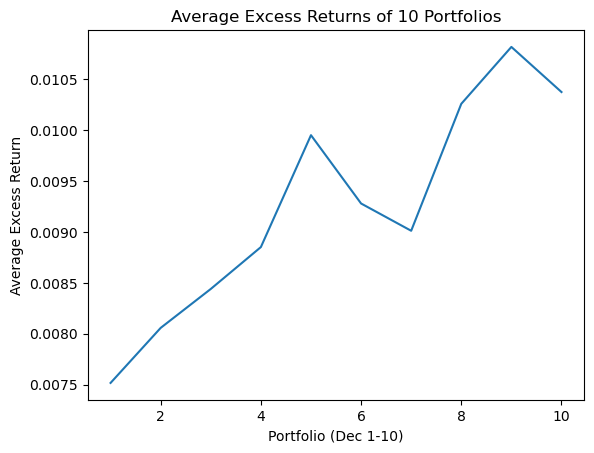

In [ ]:
#plot port_ret
import matplotlib.pyplot as plt
plt.plot(average_returns[:10])

#title

plt.title('Average Excess Returns of 10 Portfolios')
plt.ylabel('Average Excess Return')
plt.xlabel('Portfolio (Dec 1-10)')




In [25]:

### Market model regressions ###
table_capm = []
for p in ranklist:
    # regress portfolio excess return on market excess return
    results = sm.OLS(portfolios_ff['ExRet_'+str(p)],
                     sm.add_constant(portfolios_ff['ExMkt'])).fit()

    # collect results
    table_row = pd.DataFrame({'alpha':results.params['const'],
                              'alpha_t':results.tvalues['const'],
                              'alpha_pval': results.pvalues['const'],
                              'beta_mkt':results.params['ExMkt'],
                              'beta_t':results.tvalues['ExMkt'],
                              'beta_pval': results.pvalues['ExMkt'],
                              'rmse':np.sqrt(results.mse_resid),
                              'R2':results.rsquared},
                             index=[p])
    



    table_capm += [table_row]
#add ls's regression
for p in ['L-S1','L-S2','L-S3','L-S4','L-S5']:
    # regress portfolio excess return on market excess return
    results = sm.OLS(portfolios_ff[p],
                     sm.add_constant(portfolios_ff['ExMkt'])).fit()
    table_row = pd.DataFrame({'alpha':results.params['const'],
                                'alpha_t':results.tvalues['const'],
                                'alpha_pval': results.pvalues['const'],
                                'beta_mkt':results.params['ExMkt'],
                                'beta_t':results.tvalues['ExMkt'],
                                'beta_pval': results.pvalues['ExMkt'],
                                'rmse':np.sqrt(results.mse_resid),
                                'R2':results.rsquared},
                                index=[p])




    table_capm += [table_row]


# Combine the results for all portfolios
table_capm = pd.concat(table_capm,axis=0)
table_capm.index.name = 'quintile'

# show results of L-S
table_capm
print("CAPM\n",table_capm)


CAPM
                alpha   alpha_t  alpha_pval  beta_mkt     beta_t  \
quintile                                                          
SMALL LoOP -0.001097 -0.352281    0.724881  1.342039  20.031470   
ME1 OP2     0.004290  2.022402    0.044043  0.986489  21.611060   
ME1 OP3     0.004132  2.060423    0.040241  0.946403  21.929443   
ME1 OP4     0.005716  1.419994    0.156673  1.000133  11.545098   
SMALL HiOP  0.001352  0.563880    0.573267  1.240166  24.044258   
ME2 OP1    -0.002382 -0.965532    0.335075  1.374719  25.893789   
ME2 OP2     0.002064  1.147837    0.251972  1.100547  28.435908   
ME2 OP3     0.003355  1.852252    0.064995  0.994334  25.512396   
ME2 OP4     0.003651  1.904869    0.057776  1.091363  26.458636   
ME2 OP5     0.003324  1.591999    0.112463  1.188382  26.452478   
ME3 OP1    -0.003088 -1.357753    0.175587  1.376033  28.115022   
ME3 OP2     0.001590  1.047785    0.295601  1.025771  31.404984   
ME3 OP3     0.002712  1.918488    0.056021  1.045276  34

In [26]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   L-S5   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     79.97
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           4.41e-17
Time:                        15:10:15   Log-Likelihood:                 577.22
No. Observations:                 295   AIC:                            -1150.
Df Residuals:                     293   BIC:                            -1143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0.002      4.027      0.0

In [33]:


### Three Factor model regressions ###
table_ff = []
for p in ranklist:
    # regress portfolio excess return on market excess return
    results = sm.OLS(portfolios_ff['ExRet_'+str(p)],
                     sm.add_constant(portfolios_ff[['ExMkt','SMB','HML']])).fit()
    
    # collect results
    table_row = pd.DataFrame({  'alpha' : results.params['const'],
                                'alpha_t' : results.tvalues['const'],
                                'alpha_pval' : results.pvalues['const'],
                                'beta_mkt' : results.params['ExMkt'],
                                'beta_mkt_t' : results.tvalues['ExMkt'],
                                'beta_mkt_pval' : results.pvalues['ExMkt'],   
                                'beta_smb' : results.params['SMB'],
                                'beta_smb_t' : results.tvalues['SMB'] ,  
                                'beta_smb_pval' : results.pvalues['SMB'] ,   
                                'beta_hml' : results.params['HML'],                
                                'beta_hml_t' : results.tvalues['HML'],
                                'beta_hml_pval' : results.pvalues['HML'],
                                'rmse':np.sqrt(results.mse_resid),
                                'R2':results.rsquared},
                                index=[p])
    table_ff += [table_row]

#add ls's regression
for p in ['L-S1','L-S2','L-S3','L-S4','L-S5']:
    # regress portfolio excess return on market excess return
    results = sm.OLS(portfolios_ff[p],
                     sm.add_constant(portfolios_ff[['ExMkt','SMB','HML']])).fit()
    table_row = pd.DataFrame({  'alpha' : results.params['const'],
                                    'alpha_t' : results.tvalues['const'],
                                    'alpha_pval' : results.pvalues['const'],
                                    'beta_mkt' : results.params['ExMkt'],
                                    'beta_mkt_t' : results.tvalues['ExMkt'],
                                    'beta_mkt_pval' : results.pvalues['ExMkt'],   
                                    'beta_smb' : results.params['SMB'],
                                    'beta_smb_t' : results.tvalues['SMB'] ,  
                                    'beta_smb_pval' : results.pvalues['SMB'] ,   
                                    'beta_hml' : results.params['HML'],                
                                    'beta_hml_t' : results.tvalues['HML'],
                                    'beta_hml_pval' : results.pvalues['HML'],
                                    'rmse':np.sqrt(results.mse_resid),
                                    'R2':results.rsquared},
                                    index=[p])
    table_ff += [table_row]
    
# Combine the results for all portfolios
table_ff = pd.concat(table_ff,axis=0)
table_ff.index.name = 'quintile'

# show results
print("Fama-French 3\n",table_ff)


Fama-French 3
                alpha   alpha_t  alpha_pval  beta_mkt  beta_mkt_t  \
quintile                                                           
SMALL LoOP -0.002461 -1.656824    0.098633  1.065276   32.180414   
ME1 OP2     0.002690  2.891498    0.004123  0.827949   39.928437   
ME1 OP3     0.002602  2.695199    0.007444  0.818917   38.066040   
ME1 OP4     0.003895  1.132040    0.258550  0.837902   10.927899   
SMALL HiOP -0.000194 -0.129725    0.896874  1.078434   32.345441   
ME2 OP1    -0.003335 -2.698344    0.007376  1.160161   42.114862   
ME2 OP2     0.000715  0.866517    0.386921  0.969544   52.734639   
ME2 OP3     0.001969  2.369883    0.018446  0.870445   47.005532   
ME2 OP4     0.002299  2.125465    0.034390  0.965474   40.044858   
ME2 OP5     0.001988  1.408275    0.160117  1.072963   34.111758   
ME3 OP1    -0.003617 -2.578854    0.010404  1.203622   38.505196   
ME3 OP2     0.000570  0.602242    0.547482  0.933117   44.253713   
ME3 OP3     0.001765  1.945226   

In [34]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   L-S5   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     36.13
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           7.03e-20
Time:                        15:19:20   Log-Likelihood:                 588.34
No. Observations:                 295   AIC:                            -1169.
Df Residuals:                     291   BIC:                            -1154.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0084      0.002      4.304      0.0

In [ ]:
with pd.ExcelWriter('result2.xlsx') as writer:
    # write results to excel
    results_df.to_excel(writer, sheet_name='avg_return')
    table_ff.to_excel(writer, sheet_name='FF3')
    table_capm.to_excel(writer, sheet_name='CAPM')

## 2. Modified the sample codes to generate our double-sort portfolios

In [ ]:
#%%############################################################################
# Step 1: Preparing the CRSP file
###############################################################################
print("Prepare CRSP file")
t = time.time() # record the current time, so we can measure how long the code takes to run

# load data
crsp =  pd.read_csv(path_data+'CRSP.csv')

# Have a look at the data
print(crsp.head())
print(crsp.dtypes)


### formatting ###
# make all variable names lowercase
crsp.columns = map(str.lower,crsp.columns)

# You should see that one of the important variables 'RET' (return) is not a number but 'object'.
# It is preferable to have this variable as a number, which Python denotes as float64 (float64 is just a special way of saying that a variable is a number)
# If you are interested search for 'floating point number'on internet. But it is computer-science issue!

# Changes the returns to number format. Non-numeric data will be NAN
crsp['ret'] = pd.to_numeric(crsp['ret'],errors='coerce') 

# Change the dateformat
crsp['date'] = pd.to_datetime(crsp['date'], format='%Y-%m-%d')

# Create separate 'year' and 'month' variables (we will use them later to merge CRSP with Compustat)
crsp['year'] = crsp['date'].apply(lambda date: date.year)
crsp['month'] = crsp['date'].apply(lambda date: date.month)

# Calculate market cap
crsp['mktcap'] = crsp['shrout'] * crsp['prc'].abs()


### Some basic data cleaning ###
# keep only common shares
crsp = crsp[crsp['shrcd'].isin([10,11])]

# keep only stocks from NYSE, AMEX and NASDAQ
crsp = crsp[crsp['exchcd'].isin([1,2,3])]

# make sure that there are no duplicates
# usually, we would investigate why there are duplicates and then decide which observation we want to keep
#    For here, it is enough to simply drop the duplicates.
crsp = crsp.drop_duplicates(subset=['date','permno'])


print('Completed in %.1fs' % (time.time()-t)) # show how long it took to run this code block


Prepare CRSP file
   PERMNO        date  SHRCD  EXCHCD TICKER                     COMNAM  \
0   10000  1985-12-31    NaN     NaN    NaN                        NaN   
1   10000  1986-01-31   10.0     3.0  OMFGA  OPTIMUM MANUFACTURING INC   
2   10000  1986-02-28   10.0     3.0  OMFGA  OPTIMUM MANUFACTURING INC   
3   10000  1986-03-31   10.0     3.0  OMFGA  OPTIMUM MANUFACTURING INC   
4   10000  1986-04-30   10.0     3.0  OMFGA  OPTIMUM MANUFACTURING INC   

   ACPERM     PRC        RET  SHROUT  
0     NaN     NaN        NaN     NaN  
1     NaN -4.3750          C  3680.0  
2     NaN -3.2500  -0.257143  3680.0  
3     NaN -4.4375   0.365385  3680.0  
4     NaN -4.0000  -0.098592  3793.0  
PERMNO      int64
date       object
SHRCD     float64
EXCHCD    float64
TICKER     object
COMNAM     object
ACPERM    float64
PRC       float64
RET        object
SHROUT    float64
dtype: object
Completed in 18.7s


In [ ]:
#%%############################################################################
# Step 2: Preparing the Compustat (CCM) file
###############################################################################
print("Prepare Compustat file")
t = time.time() # reset our timer

ccm = pd.read_csv(path_data+'CCM.csv')
ccm.columns = map(str.lower,ccm.columns)

#mkvalt = market value = size. 

### formatting ###
# make all variable names lowercase
# ccm.columns = map(str.lower,ccm.columns)

# Change the dateformat 
ccm['datadate'] = pd.to_datetime(ccm['datadate'], format='%Y-%m-%d')

# Create separate 'year' and 'month' variables
ccm['year'] = ccm['datadate'].apply(lambda x: x.year)
ccm['month'] = ccm['datadate'].apply(lambda x: x.month)


### Some basic data cleaning ###
# make sure that there are no duplicates (same as above)
ccm = ccm.drop_duplicates(subset=['datadate','gvkey'])
ccm = ccm.drop_duplicates(subset=['year','gvkey'])
ccm = ccm.drop_duplicates(subset=['year','lpermno'])


### Calculate the variables we will use for sorting ###
# Create lagged asset variable 
# Note 1) Pandas does not know the panel data structure, so we need to make sure that the previous
#    record belongs to the same gvkey, and that there are no gaps in the data
# Note 2) We can use the backslash "\" do break long lines
ccm = ccm.sort_values(['gvkey','datadate']) # sort data by gvkey and date

#operating profitbility
ccm['op'] = (ccm['revt'] - ccm['cogs'] - ccm['xint'] - ccm['xsga']) /ccm['ceq']#devide the ceq of last year

# It is useful to know how many observations are missing
print('Fraction of observations missing:')
print(1 - ccm.count() / len(ccm))


print('Completed in %.1fs' % (time.time()-t)) # show how long it took to run this code block



Prepare Compustat file
Fraction of observations missing:
gvkey       0.000000
lpermno     0.000000
datadate    0.000000
fyear       0.000013
indfmt      0.000000
consol      0.000000
popsrc      0.000000
datafmt     0.000000
curcd       0.000013
ceq         0.088881
cogs        0.089035
dp          0.126259
finxint     0.998126
revt        0.088913
tie         0.909143
xindb       1.000000
xindc       1.000000
xins        1.000000
xinst       0.999584
xint        0.238801
xintd       0.796581
xnitb       1.000000
xopr        0.089067
xsga        0.239568
costat      0.000000
mkvalt      0.178114
year        0.000000
month       0.000000
op          0.381188
dtype: float64
Completed in 0.7s


In [ ]:
pl1 = ['ME1','ME2','ME3','ME4','ME5']
pl2 = ['OP1','OP2','OP3','OP4','OP5']


In [ ]:
#%%############################################################################
# Step 3: Sort stocks into portfolios and calculate returns
###############################################################################
print("Create portfolios")
t = time.time() # reset our timer

# loop over all years in the data
# Note: the first loop loops over the years.
#    You can wrap any list by the tqdm command to display a progress bar while looping over the list
portfolios = [] # create an empty list to collect the portfolio returns
for year in tqdm(range(1999,2023),desc="years"):
    #list for all the sorted companies
    sub_portfolios = []

    # take the companies that were alive at t-1
    permno_list=list(crsp[crsp['year']==year-1]['permno'].unique()) 
    
    # get the sorting variable for these companies at t-1
    sorting_data = ccm.loc[(ccm['year']==(year-1)) & \
                           (ccm['lpermno'].isin(permno_list)), \
                           ['gvkey','lpermno','op','mkvalt']]
    
    # sort into 5 baskets by size
    nportfolios = 5 # number of portfolios
    sorting_data['rank_ME'] = pd.qcut(sorting_data['mkvalt'],nportfolios, labels=pl1)
    # in each size basket, sort into 5 baskets by op
    for ME in pl1:
        sub_sd = sorting_data[sorting_data['rank_ME']==ME]
        sub_sd['rank_op'] = pd.qcut(sub_sd['op'],5, labels=pl2)
        #concatenate the two ranks
        sub_sd['rank'] = sub_sd['rank_ME'].astype(str) + sub_sd['rank_op'].astype(str)
        sub_portfolios.append(sub_sd)
    #all the companies in the year
    sub_portfolios= pd.concat(sub_portfolios,axis=0)
    #index for next loop, exclude nan
    ranklist = [x for x in sub_portfolios['rank'].unique().tolist() if 'nan' not in x]
         
    # select the return data with some time lag to make sure that the accounting information is public (data from July at year t to June in year t+1)
    crsp_window = crsp[((crsp['year']==year) & (crsp['month']>=6)) | \
                       ((crsp['year']==year+1) & (crsp['month']<=6))]
    
        # create the portfolio returns for the current window and collect them in portfolios_window
    portfolios_window = [] 
    for p in ranklist:
        # get list of permnos that are in this portfolio
        basket = sub_portfolios.loc[sub_portfolios['rank'] == p,'lpermno'].tolist()
        
        # get returns of these permnos
        crsp_p_firms = crsp_window[crsp_window['permno'].isin(basket)]
        
        # pivot returns
        returns = crsp_p_firms.pivot(index='date', columns='permno', values='ret')
        returns = returns.iloc[1:,:] # drop the first row
        
        # create equally weighted portfolio (monthly rebalancing)
        return_port = returns.mean(axis=1)
        return_port.name = str(p)
        
        # collect portfolio returns in dec_port
        portfolios_window += [return_port]
        
    # merge the portfolios
    portfolios_window = pd.concat(portfolios_window,axis=1)
        
    # collect results in portfolios
    portfolios += [portfolios_window]

# merge the returns from all windows
portfolios = pd.concat(portfolios,axis=0)


print('Step 3 completed in %.1fs' % (time.time()-t)) # show how long it took to run this code block


Create portfolios


years:   0%|          | 0/24 [00:00<?, ?it/s]C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_14124\850640011.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sd['rank_op'] = pd.qcut(sub_sd['op'],5, labels=pl2)
C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_14124\850640011.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sd['rank'] = sub_sd['rank_ME'].astype(str) + sub_sd['rank_op'].astype(str)
C:\Users\卡拉酱\AppData\Local\Temp\ipykernel_14124\850640011.py:28: SettingWithCopyWarning: 
A value is trying to

Step 3 completed in 3.9s


In [ ]:
#%%############################################################################
# Step 4: Performance Evaluation
# Step 4a: Merge Portfolio returns with Fama French data
###############################################################################

### load and prepare fama french data ###
# load Fama French monthly factors
ff = pd.read_csv(path_data+'F-F_Research_Data_Factors_2024.csv')

# rename columns
ff.rename({'Mkt-RF':'ExMkt',
           'DATE':'date'},axis=1,inplace=True)

# date variables
ff['year'] = ff['date'] // 100
ff['month'] = ff['date'] % 100
ff.set_index('date',inplace=True)


### formatting ###
# FF data is in percent. Convert to simple returns
ff[['ExMkt', 'SMB', 'HML', 'RF']] /= 100


### merge portfolio returns with Fama French data ###
# date variables
portfolios_ff = portfolios.copy() # create a copy of the portfolios dataframe so we can use it again later
portfolios_ff['year'] = portfolios_ff.index.year
portfolios_ff['month'] = portfolios_ff.index.month

# merge
portfolios_ff = pd.merge(portfolios_ff,ff,on=['year','month'])



In [ ]:
# Calculate the excess returns
for p in ranklist:
    portfolios_ff['ExRet_'+p] = portfolios_ff[p]-portfolios_ff['RF']


In [ ]:
# Calculate the long-short portfolios
for size in range(1,6):
    portfolios_ff['Long-Short'+str(size)] = portfolios_ff['ME'+str(size)+'OP5'] - portfolios_ff['ME'+str(size)+'OP1']

The codes for calculating returns and modeling is the same as Part 1.